In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


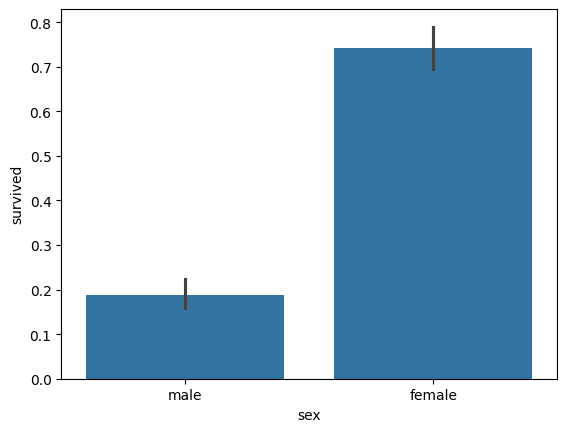

In [5]:
sns.barplot(data=df, x="sex", y="survived")
plt.show()

In [6]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

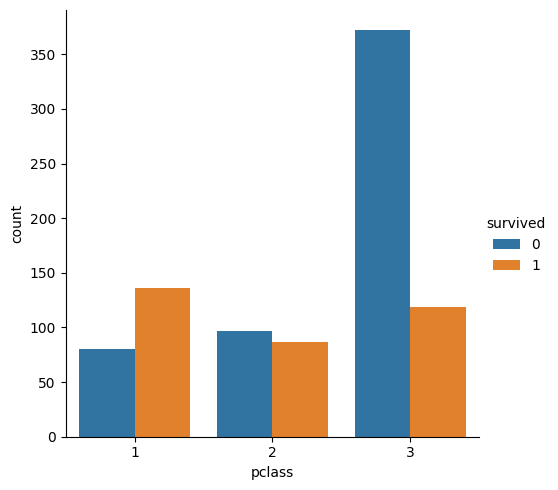

In [8]:
sns.catplot(data=df, x="pclass", hue="survived", kind="count")
plt.show()

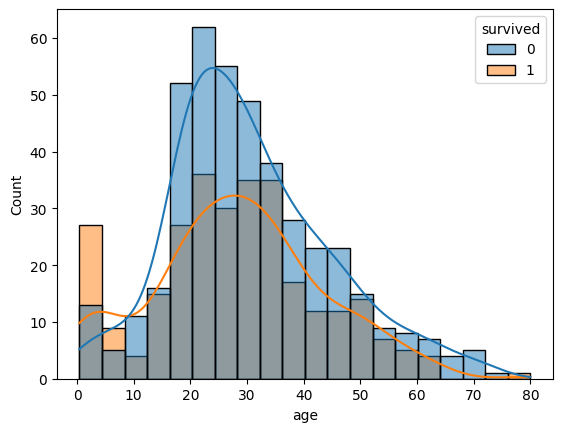

In [11]:
sns.histplot(data=df, x="age", hue="survived", kde=True)
plt.show()

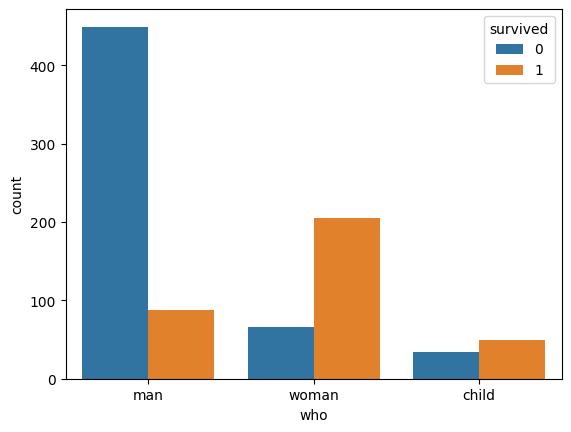

In [14]:
sns.countplot(data=df, x="who", hue="survived")
plt.show()

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.drop(["deck", "embark_town", "alive"], axis=1, inplace=True)

In [17]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [18]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df["age"] = df["age"].fillna(df["age"].median())

In [20]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [24]:
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [25]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
categorical_cols = ["sex", "class", "embarked", "who"]

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [36]:
encoded_cols = preprocessor.get_feature_names_out()

In [37]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [38]:
import lightgbm as lgb

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
clf = lgb.LGBMClassifier(verbosity=-1)
clf.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [41]:
y_pred = clf.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7892376681614349
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.76      0.75      0.75        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  23]
 [ 24  72]]


In [43]:
clf.feature_importances_

array([  60,   41,   51,   35,   81,   19,   36,   10,  865,   65,   77,
       1132,    0,   41], dtype=int32)

In [44]:
X_train.columns

Index(['one_hot__sex_male', 'one_hot__class_Second', 'one_hot__class_Third',
       'one_hot__embarked_Q', 'one_hot__embarked_S', 'one_hot__who_man',
       'one_hot__who_woman', 'remainder__pclass', 'remainder__age',
       'remainder__sibsp', 'remainder__parch', 'remainder__fare',
       'remainder__adult_male', 'remainder__alone'],
      dtype='object')

In [48]:
feature_names = X_train.columns
importances = clf.feature_importances_

feature_importance = pd.DataFrame(
    {
        "Feature": feature_names,
        "Importance": importances
    }
).sort_values(by="Importance", ascending=False)

In [49]:
feature_importance

,Feature,Importance
11,remainder__fare,1132
8,remainder__age,865
4,one_hot__embarked_S,81
10,remainder__parch,77
9,remainder__sibsp,65
0,one_hot__sex_male,60
2,one_hot__class_Third,51
13,remainder__alone,41
1,one_hot__class_Second,41
6,one_hot__who_woman,36


In [50]:
#hyperparameter tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
lgb_model = lgb.LGBMClassifier(verbosity=-1)

In [53]:
param_grid = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 7, -1],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 30],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [54]:
rscv = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [55]:
rscv.fit(X_train, y_train)

,estimator,LGBMClassifier(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'min_child_samples': [10, 20, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [56]:
rscv.best_params_

{'subsample': 1.0,
 'num_leaves': 127,
 'n_estimators': 100,
 'min_child_samples': 10,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.6}

In [57]:
y_pred = rscv.predict(X_test)

In [58]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8430493273542601
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       127
           1       0.84      0.79      0.81        96

    accuracy                           0.84       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.84      0.84      0.84       223

[[112  15]
 [ 20  76]]


In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7982062780269058
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.79      0.72      0.75        96

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[109  18]
 [ 27  69]]


In [61]:
param_grid = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 7, -1],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [65]:
rscv = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_grid, n_jobs=-1, cv=5, scoring="accuracy")
rscv.fit(X_train, y_train)
y_pred = rscv.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\EXPORT\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py", line 1683, in fi

0.820627802690583
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       127
           1       0.80      0.78      0.79        96

    accuracy                           0.82       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.82      0.82       223

[[108  19]
 [ 21  75]]
